<a href="https://colab.research.google.com/github/hdtphat/AI_W5_exercise/blob/main/AI_W5_04_03_23_Exercise_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# cài fzy logic
!pip install -U scikit-fuzzy
# thêm thư viện
import numpy as np
import skfuzzy as fz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


===================================================================================================================
✅**EXERCISE 06: Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients**

324.999999999999


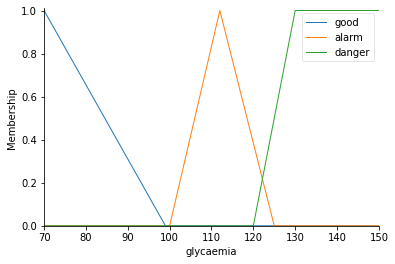

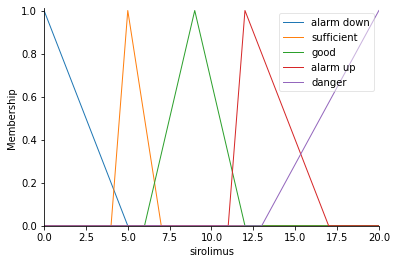

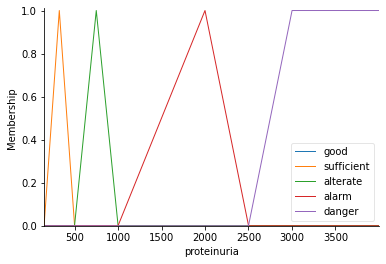

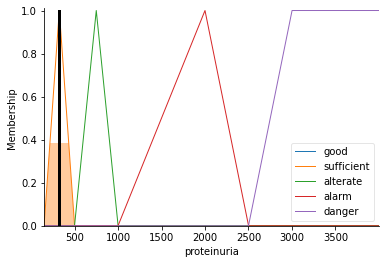

In [9]:
# biến vào
glycaemia = ctrl.Antecedent(np.arange(70, 151, 1), 'glycaemia')
sirolimus = ctrl.Antecedent(np.arange(0, 21, 1), 'sirolimus')

# biến ra
proteinuria = ctrl.Consequent(np.arange(150, 4000, 1), 'proteinuria')

# tạo các giá trị cho bảng
glycaemia['good']   = fz.trimf(glycaemia.universe, [70, 70, 99])
glycaemia['alarm']  = fz.trimf(glycaemia.universe, [100, 112, 125])
glycaemia['danger'] = fz.trapmf(glycaemia.universe,[120, 130, 150, 150])
glycaemia.view()

sirolimus['alarm down'] = fz.trimf(sirolimus.universe, [0, 0, 5])
sirolimus['sufficient'] = fz.trimf(sirolimus.universe, [4, 5, 7])
sirolimus['good']       = fz.trimf(sirolimus.universe, [6, 9, 12])
sirolimus['alarm up']   = fz.trimf(sirolimus.universe, [11, 12, 17])
sirolimus['danger']     = fz.trimf(sirolimus.universe, [13, 20, 20])
sirolimus.view()

proteinuria['good']       = fz.trimf(proteinuria.universe, [0, 0, 150])
proteinuria['sufficient'] = fz.trimf(proteinuria.universe, [150, 325, 500])
proteinuria['alterate']   = fz.trimf(proteinuria.universe, [500, 750, 1000])
proteinuria['alarm']      = fz.trimf(proteinuria.universe, [1000, 2000, 2500])
proteinuria['danger']     = fz.trapmf(proteinuria.universe,[2500, 3000, 4000, 4000])
proteinuria.view()

# tạo các quy luật
rule_1 = ctrl.Rule(glycaemia['good']&sirolimus['good'],proteinuria['good'])
rule_2 = ctrl.Rule(glycaemia['danger']&sirolimus['danger'],proteinuria['danger'])
rule_3 = ctrl.Rule(glycaemia['good']&sirolimus['sufficient'],proteinuria['sufficient'])
rule_4 = ctrl.Rule(glycaemia['alarm']&sirolimus['alarm up'],proteinuria['alarm'])
rule_5 = ctrl.Rule(glycaemia['alarm']&sirolimus['sufficient'],proteinuria['alterate'])
rule_6 = ctrl.Rule(glycaemia['good']&sirolimus['alarm up'],proteinuria['alterate'])
rule_7 = ctrl.Rule(glycaemia['alarm']&sirolimus['good'],proteinuria['sufficient'])
rule_8 = ctrl.Rule(glycaemia['good']&sirolimus['alarm down'],proteinuria['sufficient'])

# dạy máy học
ProtFIS_ctrl = ctrl.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,rule_7,rule_8])
ProtFIS = ctrl.ControlSystemSimulation(ProtFIS_ctrl)

# nhập data vào
ProtFIS.input['glycaemia']=120
ProtFIS.input['sirolimus']=10

#hiển thị kết quả
ProtFIS.compute()
print(ProtFIS.output['proteinuria'])
proteinuria.view(sim=ProtFIS)